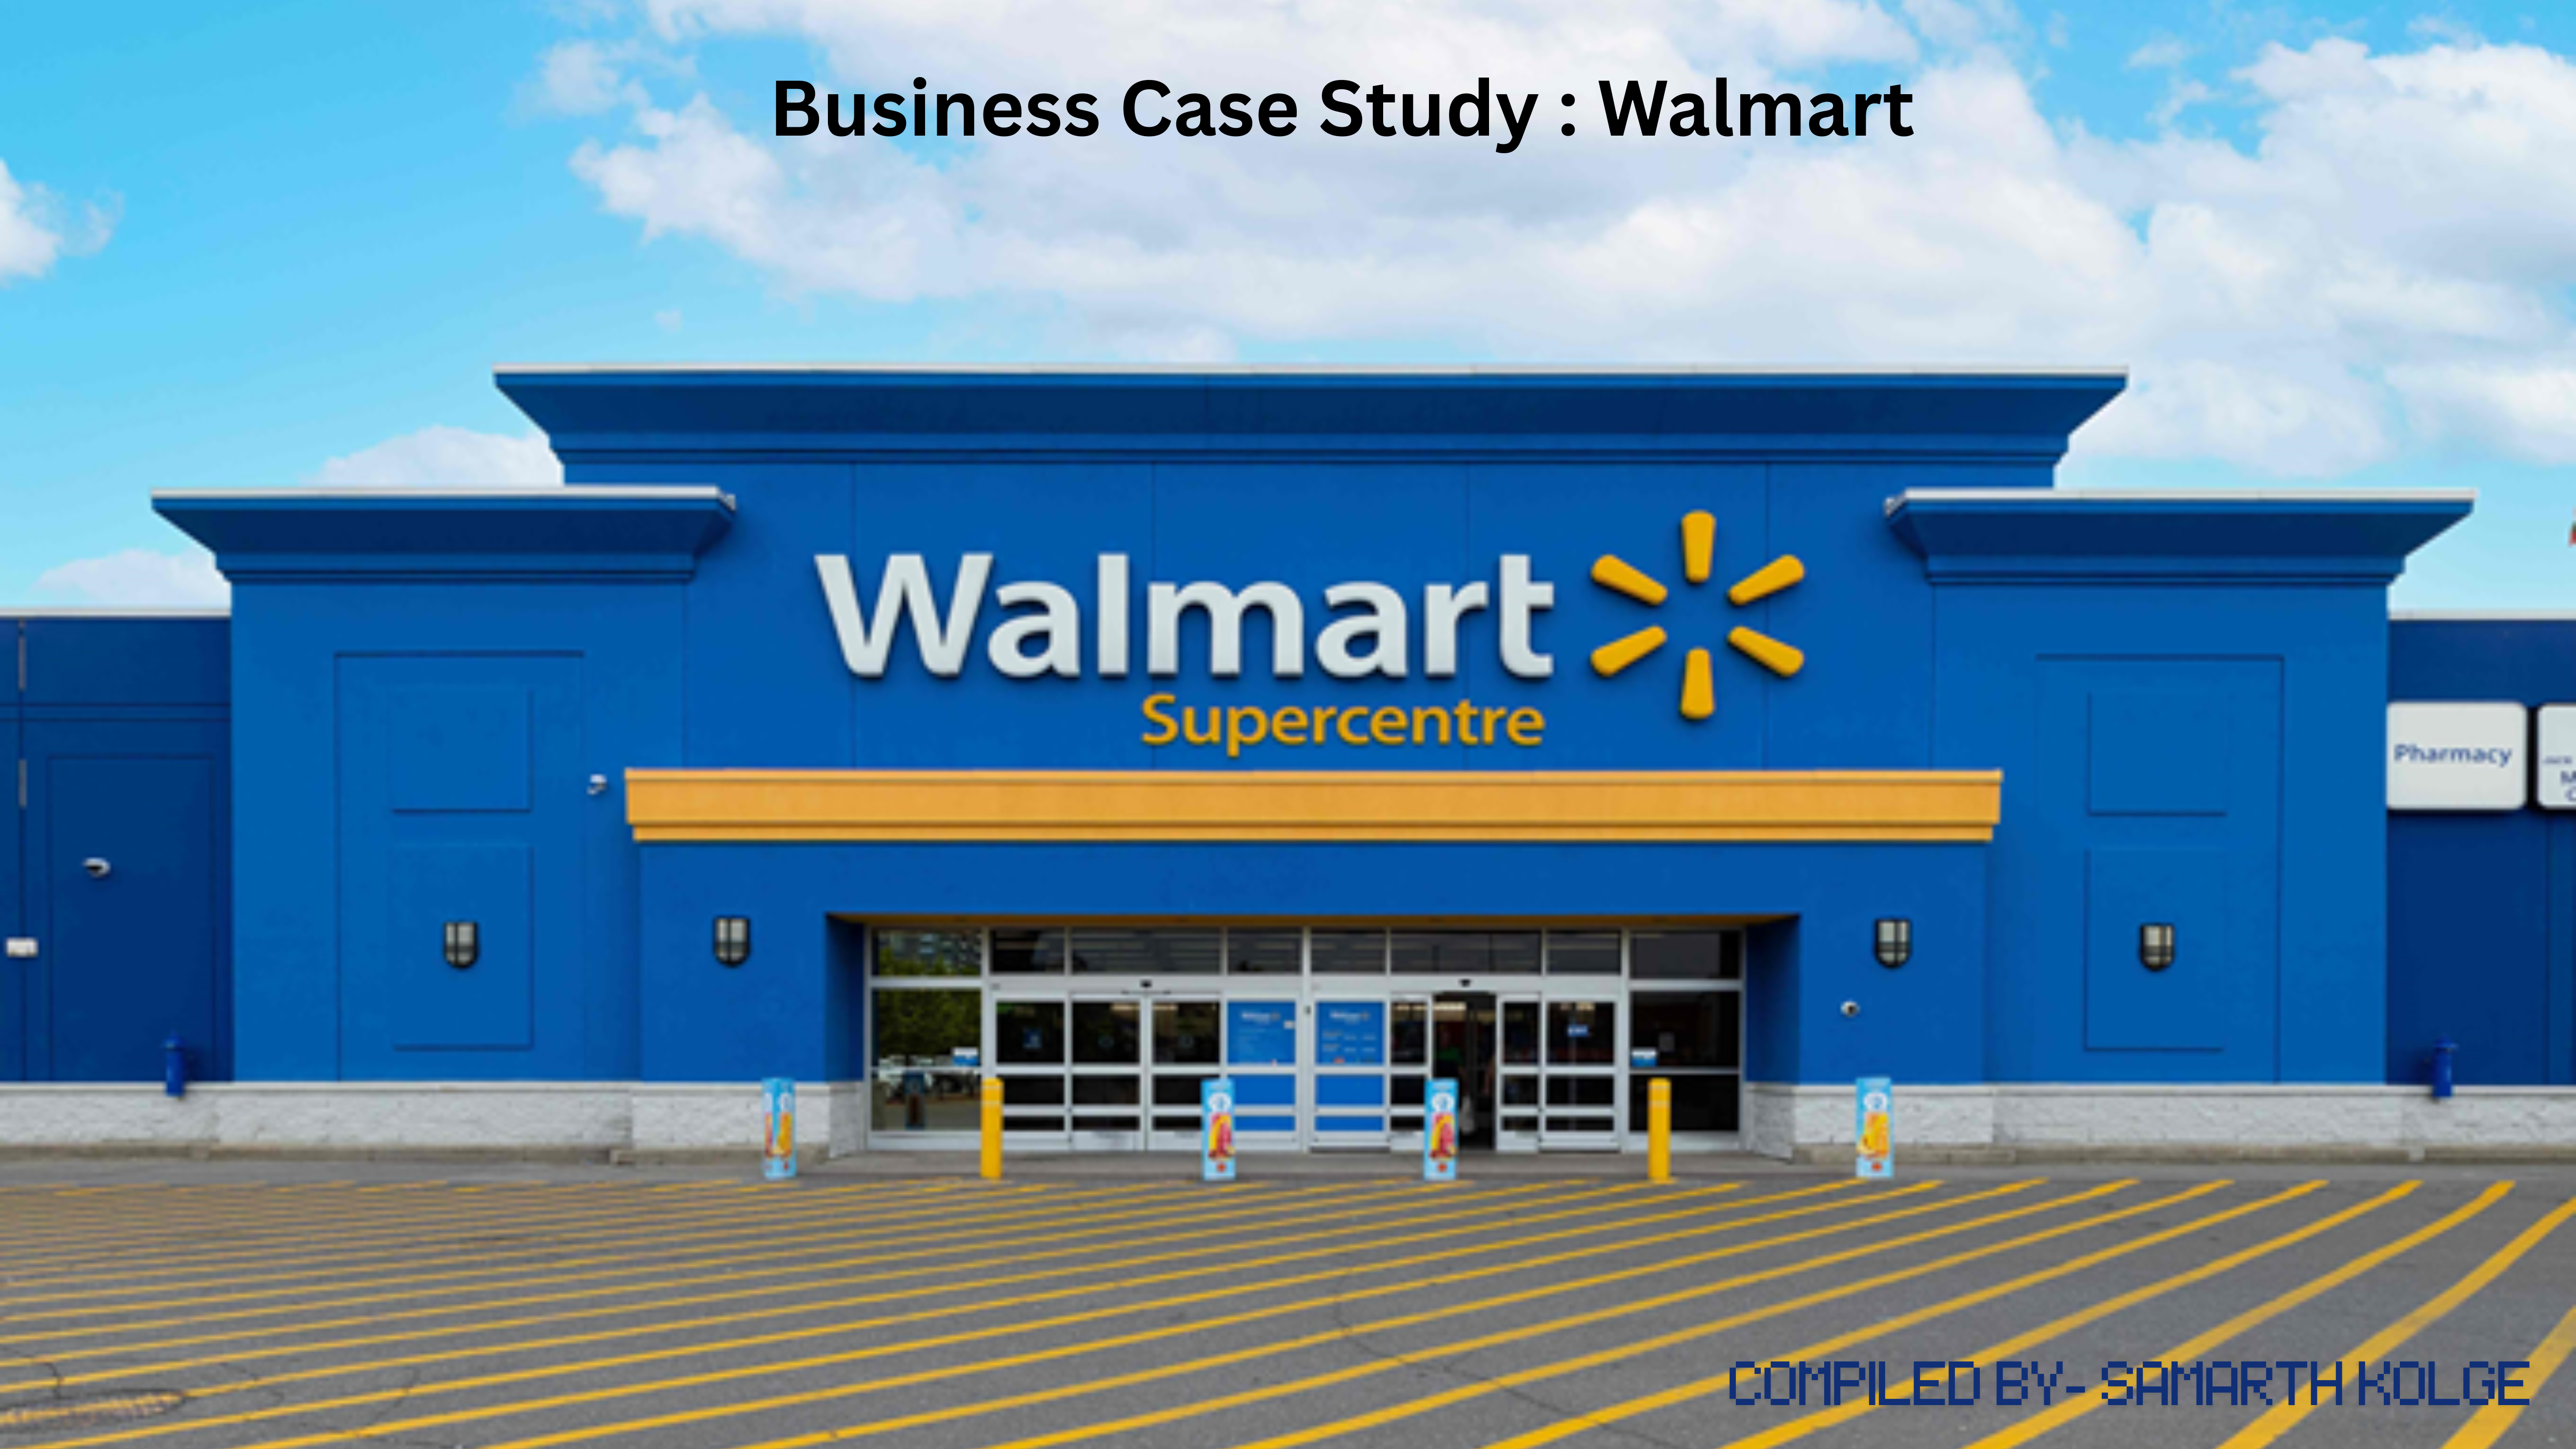

### **About Walmart**

Walmart is a leading American multinational retail corporation, operating a vast chain of supercenters, discount department stores, and grocery outlets across the United States and globally. With over **100 million customers worldwide**, Walmart continues to dominate the retail market through its extensive and diverse product offerings.


### **Business Problem**

The **Management Team at Walmart Inc.** aims to gain insights into **customer purchase behavior**, particularly focusing on the **purchase amount** in relation to **gender and other influencing factors**. This analysis will support the company in making informed business decisions.

The primary question to address is:
**Do the spending habits differ between male and female customers, especially during Black Friday?**
Assuming a customer base of **50 million males** and **50 million females**, the goal is to determine whether **women spend more than men** during this peak shopping event.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm, binom

In [2]:
#Load Dataset
df = pd.read_csv("walmart_data.csv")

In [3]:
#Checking length of dataset
len(df)

550068

In [4]:
#Checking shape of dataset
df.shape

(550068, 10)

In [5]:
#Checking data types of dataset
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
#Viewing top 5 rows of dataset
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [7]:
#Viewing Bottom 5 rows of dataset
df.tail()

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

In [8]:
#Checking there is nulls are not in the dataset
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Not contains any null value in dataset

In [9]:
#Checking behaviour of dataset, if there are huge differece between mean and median then we can assume there are outliers.
df.describe(include="all")

User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068   550068.000000     550068.000000   
unique                          5             NaN               NaN   
top                             1             NaN               NaN   
freq                       193821             NaN               NaN   
mean                          NaN        0.409653          5.404270   
std                           NaN        0.491770          3.936211   
min                           NaN        0.000000          1.000000   
25%                           NaN        0.000000          1.000000   
50%                           NaN        0.000000          5.000000   
75%                           NaN        1.000000          8.000000   
max                           NaN        1.000000         20.000000   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

In [10]:
#Converting categorical columns to category type for better memory usage and performance
category_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in category_cols:
    df[col] = df[col].astype('category')
print(df.dtypes)

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category                 int64
Purchase                         int64
dtype: object


In [11]:
#Checking value counts to better understand dataset
x = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for Col in x:
    print(df[Col].value_counts())
    print("-"*100)

M    414259
F    135809
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
----------------------------------------------------------------------------------------------------
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
----------------------------------------------------------------------------------------------------
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
----------------------------------------------------------------------------------------------------
0    324731
1    225337
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------
5     150933
1     140378
8     113925
11     24287
2      23864
6 

The dataset shows a significant gender imbalance with approximately 75% males and 25% females. The most common age group is 26-35 years, followed by 36-45 years, indicating a majority of prime working-age individuals. City Category 'B' has the highest representation, suggesting a dominance of mid-tier city participants.

# Univariate Analysis

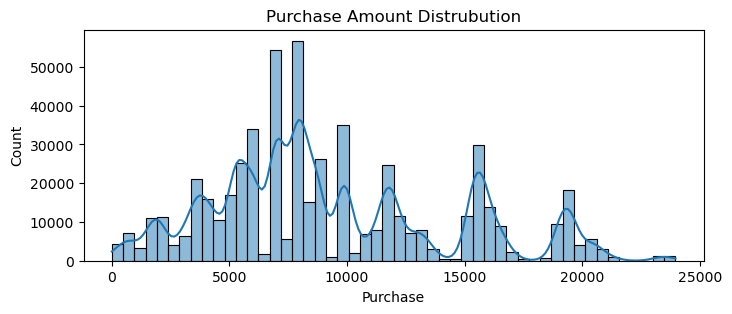

In [12]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x="Purchase", bins=50, kde=True)
plt.title("Purchase Amount Distrubution")
plt.show()

The purchase amount distribution indicates that most customers tend to spend between 7,000 to 8,000. Additionally, there are a few high-spending customers who make purchases up to approximately 24,000.

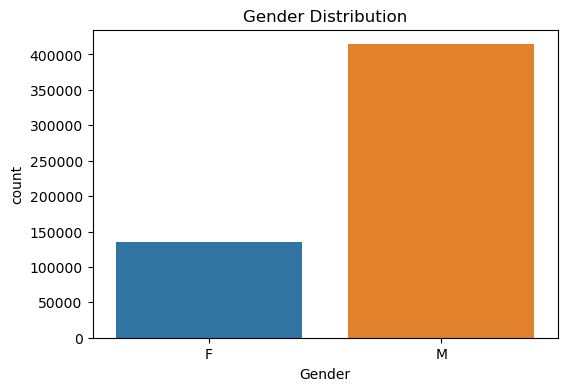

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x="Gender")
plt.title("Gender Distribution")
plt.show()

The gender distribution countplot shows a big difference, with about 75% males (414,259) compared to 25% females (135,809). This means there are far more males than females in the dataset.

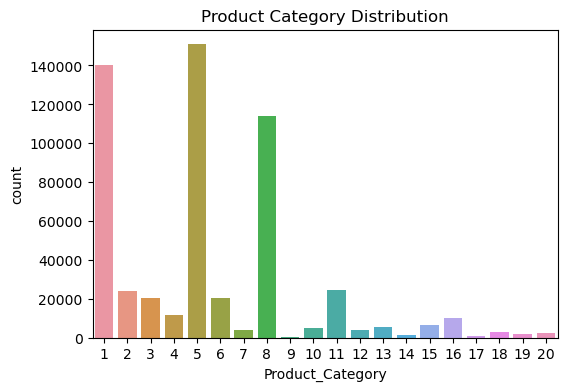

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data = df, x="Product_Category")
plt.title("Product Category Distribution")
plt.show()

Product Category 5 has the highest number of purchases, followed closely by Category 1, indicating that these two categories are the most popular among customers.

# Bivariate Analysis

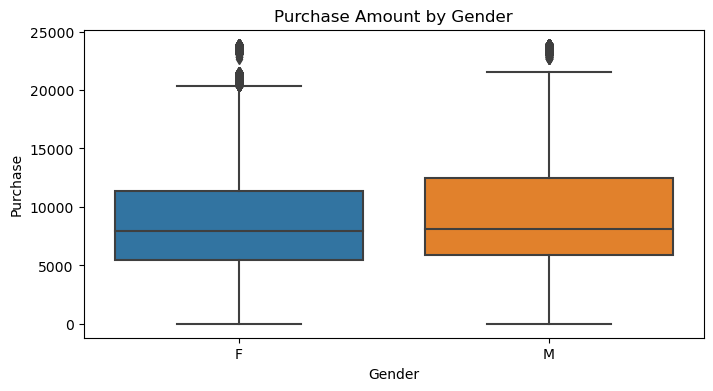

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.title('Purchase Amount by Gender')
plt.show()

The median purchase amount is roughly similar for both males and females, around 8,000. However, some customers from both genders make very high-value purchases exceeding 20,000, shown by the outliers.

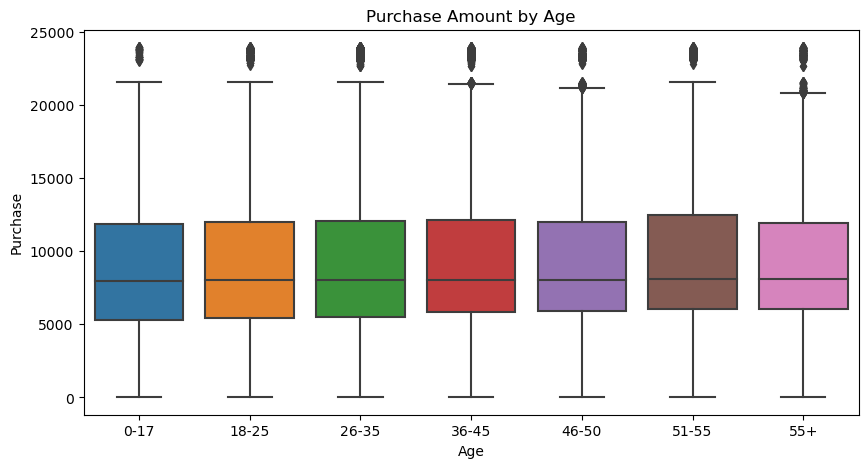

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Age', y='Purchase')
plt.title('Purchase Amount by Age')
plt.show()

Purchase behavior is fairly consistent across all age groups, with median spending around 7,000 to 8,000. The highest spending customers appear in every age category, as shown by the outliers above 20,000. No age group shows a significantly different spending pattern compared to others.

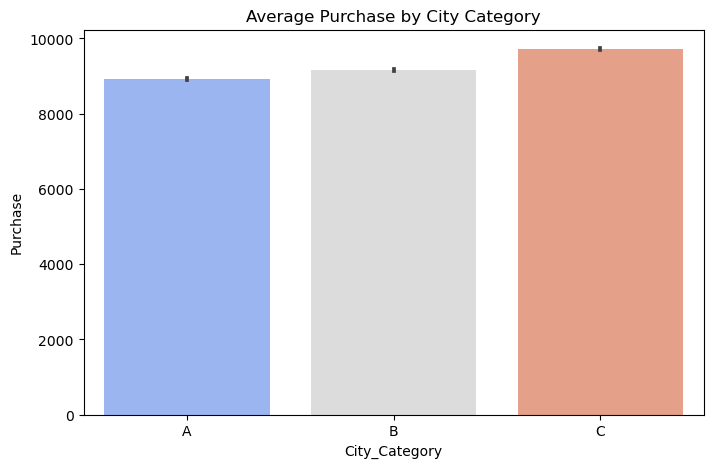

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='City_Category', y='Purchase', estimator=np.mean, palette='coolwarm')
plt.title('Average Purchase by City Category')
plt.show()

The bar plot reveals that purchases in City Category C are the highest, averaging around 9.5k, followed by City Category B with an average purchase of 9k, indicating that customers from Category C tend to spend slightly more.

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Marital_Status', y='Purchase', palette='viridis')
plt.title('Purchase Amount by Marital Status')
plt.xticks([0, 1], ['Unmarried', 'Married'])
plt.show()

NameError: name 'data' is not defined

<Figure size 600x400 with 0 Axes>

The data shows that both married and unmarried individuals spend approximately the same amount of money. However, unmarried individuals tend to spend a slightly higher amount on average compared to married ones.

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='City_Category', y='Purchase', hue='Marital_Status', estimator=np.mean, palette='coolwarm')
plt.title('Average Purchase by City Category and Marital Status')
plt.show()

The graph indicates that in City Category A, unmarried people tend to spend slightly more compared to married individuals. However, in City Categories B and C, both married and unmarried people have roughly equal purchase amounts.

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Occupation", y="Purchase", palette="Set2")
plt.title("Average Purchase Amount by Occupation", fontsize=14, fontweight='bold')
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Average Purchase", fontsize=12)
plt.show()

Occupations 12 and 17 have slightly higher average purchase amounts compared to others, while most occupations show similar spending patterns. The small error bars indicate that the average purchase amounts are consistent within each occupation.

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='City_Category', y='Purchase', hue='Gender', estimator=np.mean, palette='pastel')
plt.title('Average Purchase by Gender and City Category')
plt.show()

The graph reveals that in City Category A, males made more purchases, averaging around 9k. Similarly, in City Categories B and C, males also lead in spending, with City B showing the highest male purchase amount, close to 10k.

In [ ]:
plt.figure(figsize=(8, 5))

# KDE Plot for Male Customers
sns.kdeplot(data=data[data['Gender'] == 'M']['Purchase'], label='Male', fill=True, color='blue', alpha=0.5)

# KDE Plot for Female Customers
sns.kdeplot(data=data[data['Gender'] == 'F']['Purchase'], label='Female', fill=True, color='pink', alpha=0.5)

# Adding Title and Legend
plt.title('Density Plot of Purchase Amount by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend(title='Gender')
plt.show()

Both males and females show similar purchase patterns, with a primary peak around 5,000 to 8,000. However, males have a slightly higher density in higher purchase ranges (around 15,000), indicating that males tend to make more high-value purchases.

In [ ]:
plt.figure(figsize=(4, 4))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a moderate negative correlation (-0.34) between Product_Category and Purchase, indicating that some product categories are associated with lower purchase amounts. Other features like Occupation and Marital_Status show almost no correlation with Purchase, suggesting they don’t strongly influence the purchase amount.

In [ ]:
pairplot = sns.pairplot(df[['Occupation', 'Purchase']], diag_kind='kde')
pairplot.fig.suptitle('Pair Plot of Occupation and Purchase', y=1.02) 
plt.show()

The density plots reveal that most purchases cluster around 5,000 to 15,000 units, and occupations have multiple peaks indicating varied job groups. However, there is no clear visible relationship or trend between occupation and purchase amount from the scatter plots.

In [ ]:
# Calculate total and average purchase for male and female customers
male_purchase = data[data['Gender'] == 'M']['Purchase']
female_purchase = data[data['Gender'] == 'F']['Purchase']

male_avg = male_purchase.mean()
female_avg = female_purchase.mean()

print(f'Average Purchase by Male Customers: {male_avg}')
print(f'Average Purchase by Female Customers: {female_avg}')

In [ ]:
# Confidence Interval Calculation Function
def confidence_interval(data, confidence=0.95):
    n = len(data)  # Sample size
    mean = np.mean(data)  # Mean of sample
    std = np.std(data, ddof=1)  # Standard deviation with Bessel's correction
    z_score = norm.ppf((1 + confidence) / 2)  # Z-score for given confidence level
    margin = z_score * (std / np.sqrt(n))  # Margin of error
    return mean - margin, mean + margin

# Calculate confidence intervals
male_ci = confidence_interval(male_purchase)
female_ci = confidence_interval(female_purchase)

print(f'95% Confidence Interval for Male Purchase: {male_ci}')
print(f'95% Confidence Interval for Female Purchase: {female_ci}')


In [ ]:
# Trying different sample sizes and confidence levels
sample_sizes = [100, 500, 1000, 5000]
confidence_levels = [0.90, 0.95, 0.99]

for size in sample_sizes:
    sample_male = male_purchase.sample(size, random_state=1)
    sample_female = female_purchase.sample(size, random_state=1)

    print(f'\nSample Size: {size}')
    for conf in confidence_levels:
        male_ci = confidence_interval(sample_male, confidence=conf)
        female_ci = confidence_interval(sample_female, confidence=conf)
        print(f'{int(conf * 100)}% CI for Male: {male_ci}')
        print(f'{int(conf * 100)}% CI for Female: {female_ci}')

In [ ]:
# Check if confidence intervals overlap
def check_overlap(ci1, ci2):
    return not (ci1[1] < ci2[0] or ci2[1] < ci1[0])

print(f'Overlap between Male and Female CI: {check_overlap(male_ci, female_ci)}')

Similar Analysis for Marital Status and Age Groups

In [ ]:
married_purchase = data[data['Marital_Status'] == 1]['Purchase']
unmarried_purchase = data[data['Marital_Status'] == 0]['Purchase']

married_ci = confidence_interval(married_purchase)
unmarried_ci = confidence_interval(unmarried_purchase)

print(f'CI for Married: {married_ci}')
print(f'CI for Unmarried: {unmarried_ci}')
print(f'Overlap between Married and Unmarried CI: {check_overlap(married_ci, unmarried_ci)}')

In [ ]:
age_bins = ['0-17', '18-25', '26-35', '36-50', '51+']
for age in age_bins:
    age_purchase = data[data['Age'] == age]['Purchase']
    age_ci = confidence_interval(age_purchase)
    print(f'CI for Age Group {age}: {age_ci}')

### Walmart Purchase Insights and Recommendations

As a Data Analyst, I have carefully analyzed the customer purchase data and identified key insights along with actionable recommendations that will help Walmart optimize sales strategies and enhance customer engagement.

#### Key Insights:

1. **Gender-Based Purchase Patterns:** Male customers tend to spend significantly more on average (around 9,437) compared to female customers (around 8,734). This difference is statistically significant as there is no overlap between the confidence intervals of male and female purchases.

2. **Effect of Marital Status:** Both married and unmarried individuals exhibit similar spending patterns, but unmarried individuals show a slightly higher purchase tendency.

3. **Occupation and Spending:** There is no significant difference in purchase behavior across various occupations, with most groups averaging around 9,000-10,000.

4. **Age Group Spending Trends:** Age group 26-35 shows the highest average purchase amount, while age group 0-17 has a noticeably lower purchase average.

5. **City-Wise Purchases:** City category C shows the highest average purchases (around 9.5k), followed by category B (9k), and then A.

6. **Male Purchases by City:** Males consistently purchase more than females across all city categories, particularly in City B where the average male purchase approaches 10k.

7. **Density Distribution:** The density plot shows that most purchases are concentrated between 5,000 and 15,000, with males having a higher peak compared to females.

8. **Correlation Observations:** Product category and purchase amount show a moderate negative correlation (-0.34), indicating that as the product category number increases, the purchase amount slightly decreases.

9. **Statistical Stability:** With larger sample sizes (1,000 or more), confidence intervals become narrower, indicating more reliable estimates.

10. **Confidence Interval Insights:** For smaller samples (n=100), the purchase range is wider, but for larger samples (n=5,000), the purchase range stabilizes, highlighting the need for larger sample sizes for accurate predictions.

11. **Density Differences by Gender:** Male purchases show a slightly broader distribution compared to females, indicating varied spending habits among males.

12. **Pair Plot Observations:** No clear linear relationship is observed between occupation and purchase, indicating that occupation alone may not be a strong predictor of purchase behavior.

13. **Heatmap Insights:** The low correlations among variables indicate that demographic factors (like occupation or marital status) have a minimal direct impact on purchase amount.

14. **CI Overlap in Marital Status:** The overlap between married and unmarried confidence intervals suggests that marital status is not a strong differentiator in purchase behavior.

15. **Purchase Stability Across Age:** Age groups 36-50 and 51+ show missing CI data, which may indicate a need for more data collection or handling missing values in these groups.

#### Recommendations:

1. **Target Male Customers with Promotions:** Since males spend more, designing male-focused marketing campaigns can boost sales.

2. **Enhance Offers for Unmarried Individuals:** Providing customized offers targeting unmarried individuals may increase their purchase frequency.

3. **Focus on Age Group 26-35:** As this group shows the highest spending, promotions aimed at young adults could be highly effective.

4. **City-Specific Strategies:** Develop campaigns specifically for City C as it shows the highest purchasing power, followed by City B.

5. **Monitor Product Category Trends:** Investigate why higher product categories correlate with lower purchases and adjust the product lineup accordingly.

6. **Increase Sampling Size for Accuracy:** Rely on larger sample sizes when analyzing demographic impacts to ensure reliable insights.

7. **Introduce Male-Oriented Products in City B:** Since male purchases are highest in City B, consider introducing products that appeal specifically to male demographics in this area.

8. **Enhance Data Quality:** Collect more data for age groups 36-50 and 51+ to understand their purchase behavior better.

9. **Gender-Specific Promotions:** Since males and females exhibit different spending patterns, tailor promotions accordingly to maximize effectiveness.

10. **Leverage Purchase Patterns for Campaigns:** Use the density plot insights to create discount strategies targeting purchase peaks between 5,000 and 15,000.

11. **Personalized Marketing by Occupation:** Although occupations do not significantly affect purchases, combining this data with other demographics could yield more precise targeting.

12. **Analyze Product Lineup:** Since higher product categories have lower purchase averages, reassess the product mix to align with customer preferences.

13. **Use Predictive Models for Male Purchases:** The broader distribution among males suggests the potential for segmentation within the male customer base.

14. **Seasonal and Event-Based Promotions:** Since purchase patterns are stable with larger samples, tailor seasonal campaigns based on reliable data.

15. **Focus on Young Urban Males:** Combining the insights from age, city, and gender data suggests that young urban males are a key demographic for driving sales.
